In [260]:
import numba as nb
import random
import math
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import powerlaw
from collections import Counter
from mpl_toolkits import mplot3d
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from networkx import erdos_renyi_graph

# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm


import matplotlib.font_manager as fm # Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 2)

In [160]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1, gamma = 3):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.in_degree(n) > max_degree:
            max_degree = graph.in_degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.in_degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    

    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-gamma) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

In [228]:
import random
import networkx as nx

def BA(group1, group2, edges, percentage):
    '''
    Making a scale-free network properties when you have two groups

    group1: Takes as input a list of nodes
    group2: Takes as input a list of nodes

    edges: int amount of edges your network has

    percentage: float between 0 and 100 
    '''
  

    # Algorithms that produce scale-free network properties when you have two groups

    tot = 0
    bin_ = random.sample(group1, k = math.ceil(len(group1)*(percentage/100)))
    print(bin_)
    
    x = bin_[0]
#     bin_ = random.sample(group1, k = 1)
    
    p_sum = 0
    edge_list = []
    
    destination_nodes = []
    i = 0
    while i < (edges):
        
        
        group2_node = random.choice(group2)
  

        chosen_node = random.choice(bin_)
        
        
        

        
        
        
        edge = tuple([group2_node, chosen_node])
        
        if edge not in edge_list:
            edge_list.append(edge)
            
            destination_nodes.append(chosen_node)
            bin_.append(random.choice(group1))
            if np.random.uniform() > percentage/100:
                bin_.append(chosen_node)
            i+=1
            
        else: continue
        c = bin_.count(x)
        
        p = c/len(bin_)
        
        p_sum += p
        
        
        
        tot += p * (c/len(group1))
    print(p_sum)
    c = Counter(destination_nodes)
    c.most_common(1)
    print ("",c.most_common(1))
    print(tot + p_sum)
    
    if c.most_common(1)[0][0] != x:
        p_sum = 0
    return edge_list, p_sum, tot




In [278]:
l_degrees_all = []
p_sum_all = []
tot_all = []

# p_c = []
# for i in range(100):
group1 = random.sample(range(1, 100000), 20000)
group2 = random.sample(range(100000, 200000), 20000)

edges = 100000
percentage  = 10

edgelist, p_sum, tot = BA(group1, group1, edges, percentage)

if p_sum != 0:
    p_sum_all.append(p_sum)

    tot_all.append(tot)

H = nx.DiGraph(edgelist)

l_degrees = [ i[1] for i in H.out_degree()]
    
#     l_degrees_all.extend(l_degrees)
    

[94832, 57264, 45061, 71268, 30508, 67256, 86886, 3604, 91819, 73671, 11685, 28508, 94067, 18147, 14171, 30237, 84187, 6638, 4729, 55972, 22871, 88817, 93419, 83688, 23494, 58230, 56354, 70848, 14714, 35767, 73020, 31647, 67944, 12481, 42313, 29862, 28457, 58201, 28276, 79821, 83983, 85506, 2973, 76476, 74975, 11872, 91248, 16570, 86470, 32458, 41370, 23021, 73633, 13638, 11225, 56423, 38884, 24094, 18734, 3727, 93568, 33111, 52971, 12290, 22057, 85459, 58691, 89713, 83114, 48688, 61147, 33808, 50056, 9804, 90107, 68299, 36624, 23725, 73145, 97697, 31753, 56202, 28232, 83167, 86273, 37489, 79552, 31631, 3341, 14834, 88245, 2694, 35994, 9007, 63145, 80812, 70453, 51530, 24920, 84290, 62637, 64535, 43036, 32397, 6820, 69440, 95673, 72713, 20865, 65911, 16797, 26909, 87195, 29757, 9025, 20004, 52722, 64973, 64263, 50549, 67287, 67826, 47552, 82965, 97818, 95568, 47316, 85913, 7480, 79843, 69620, 11552, 86976, 30867, 80428, 53721, 37786, 42288, 39546, 81948, 67379, 9795, 94812, 42229, 2226

KeyboardInterrupt: 

In [23]:
l = []
g = range(10000)
l.append(1)

p = 0
for i in range(100):
    l.append(1)
    
    x = random.sample(g, 1)[0]
    
#     print(l.count(1)/len(l))
    l.append(x)
    p+=l.count(1)/len(l)

TypeError: random_sample() takes at most 1 positional argument (2 given)

In [204]:
print(np.mean(p_sum_all))
print(np.mean(tot_all))

print(np.mean(p_sum_all) + np.mean(tot_all))

593.6813653392945
42.71023966363683
636.3916050029313


In [279]:
l_degrees = [ i[1] for i in H.in_degree()]

In [271]:
z = Counter(l_degrees)

z = z.most_common()


x = [i[0] for i in z]
y = [i[1] for i in z]
# l_degrees.count(0)
# l_degrees[:10]
output_df = pd.DataFrame()
output_df['x'] = x
output_df['y'] = y
output_df.to_csv('output_file.dat', index =False, sep=' ')

In [56]:
x = 0
for i in range(1000):
    x += i/10000
    
print(x + 2000)

2049.95


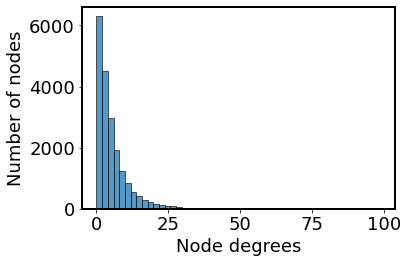

5.004504053648284

In [283]:
sn.histplot(data=l_degrees, bins = 50)

plt.xlabel('Node degrees')
plt.ylabel('Number of nodes')
plt.tight_layout()


plt.savefig(f'Node distribution k_f = {percentage/100}.pdf')

plt.show()
max(l_degrees)
np.mean(l_degrees)

In [269]:
from scipy.stats import binom

n, p = 20000, 0.4

# mean, var, skew, kurt = 
binom.stats(n, p, moments='mvsk')



(array(8000.), array(4800.), array(0.00288675), array(-9.16666667e-05))

(array([6.109e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.039e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.270e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

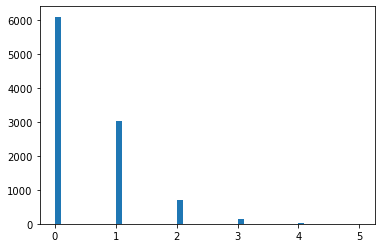

In [27]:
from numpy import random as nr

x = nr.poisson(lam=.5, size=10000)

plt.hist(x, bins = 50) 

In [243]:
l_degrees

x = powerlaw.Fit(l_degrees)

D = x.D

print(D)

gamma = x.power_law.alpha
x.distribution_compare('truncated_power_law', 'lognormal')
# c = 0
# for i in p_c:
#     if i[1]<0.05:
#         print(i)
#         c +=1
gamma

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


0.025121396488628822


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


3.1371275375528205

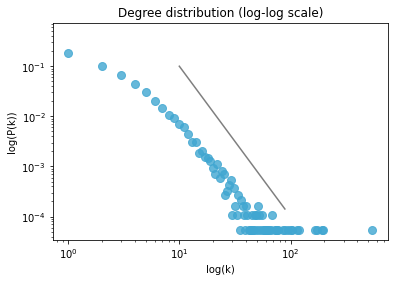

In [242]:
k_distrib(graph=H, colour='#40a6d1', scale='log', alpha=.8, fit_line=True, expct_lo=10, expct_hi=90
, expct_const=100, gamma=3)

In [115]:
x = []
for i in range(1,100):
    x.append(i**-3)
    
print(x)

[1.0, 0.125, 0.037037037037037035, 0.015625, 0.008, 0.004629629629629629, 0.0029154518950437317, 0.001953125, 0.0013717421124828531, 0.001, 0.0007513148009015778, 0.0005787037037037037, 0.0004551661356395084, 0.00036443148688046647, 0.0002962962962962963, 0.000244140625, 0.0002035416242621616, 0.00017146776406035664, 0.0001457938474996355, 0.000125, 0.00010797969981643452, 9.391435011269723e-05, 8.218952905399852e-05, 7.233796296296296e-05, 6.4e-05, 5.689576695493855e-05, 5.080526342529086e-05, 4.555393586005831e-05, 4.1002091106646436e-05, 3.7037037037037037e-05, 3.3567184720217515e-05, 3.0517578125e-05, 2.7826474107465842e-05, 2.54427030327702e-05, 2.3323615160349855e-05, 2.143347050754458e-05, 1.9742167295125657e-05, 1.822423093745444e-05, 1.6858005023685498e-05, 1.5625e-05, 1.4509365795621073e-05, 1.3497462477054314e-05, 1.2577508898587546e-05, 1.1739293764087153e-05, 1.0973936899862826e-05, 1.0273691131749815e-05, 9.631777159203644e-06, 9.04224537037037e-06, 8.499859752314087e-06,

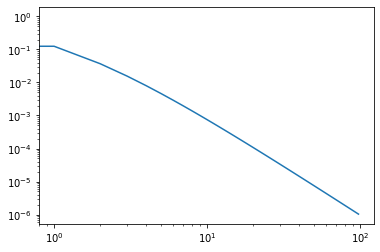

In [122]:

plt.xscale('log')
plt.yscale('log')
plt.plot(range(99), x)



In [510]:

x = []

y = []


x = np.array([0]*2000)
for i in range(100, 10000, 100):
    group1 = random.sample(range(1, 100000), 1000)
    group2 = random.sample(range(100000, 200000), 1000)

    edges = i
    percentage  = 0.01

    edgelist = Barabasi(group1, group2, edges, percentage)

   
    H = nx.Graph(edgelist)
    l_degrees = [ i[1] for i in H.degree()]
#     print(l)
    print(len(l_degrees))
    
    
#     np.vstack((x,np.array(l_degrees)))
    
    

[69301]


NetworkXError: Input is not a valid edge list

(99,)
(10, 12)


<ipython-input-15-f392d804022f>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array(x).shape)


<IPython.core.display.Javascript object>


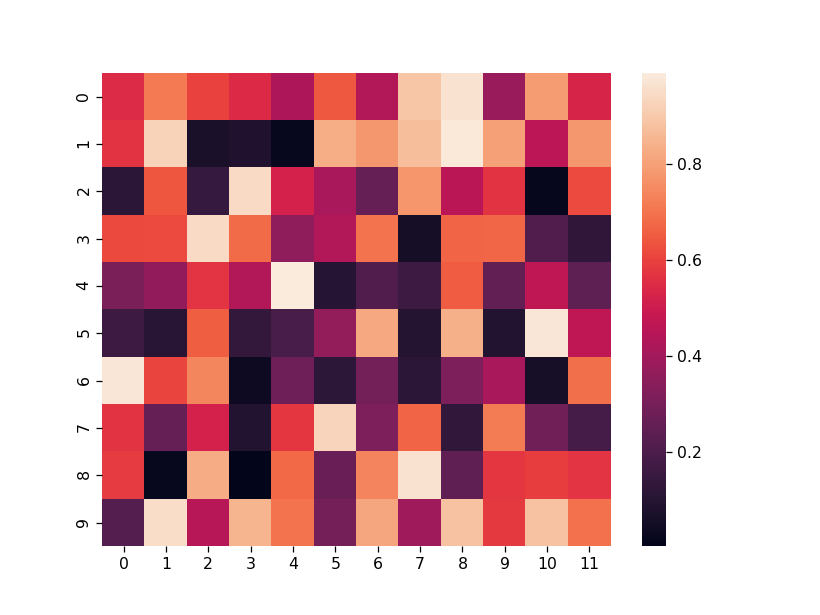

<AxesSubplot:>

In [15]:
import numpy as np; np.random.seed(0)

import seaborn as sns



uniform_data = np.random.rand(10, 12)

print(uniform_data.shape)
sns.heatmap(uniform_data)

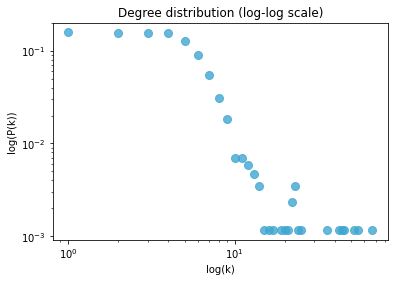

Calculating best minimal value for power law fit
C:\Users\KGulp\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


4.542906966090319


C:\Users\KGulp\anaconda3\lib\site-packages\powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


(-0.9667185841520747, 0.04550736269813779)

<AxesSubplot:>

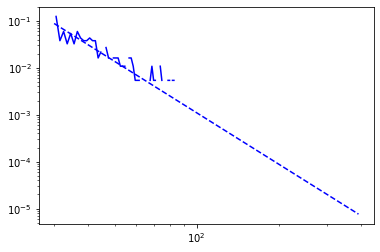

In [110]:
fig2 = x.plot_pdf(color='b', linear_bins = True)

x.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)



In [109]:
powerlaw.plot_pdf(l_degrees, linear_bins=True, color='r')

OverflowError: cannot convert float infinity to integer

In [694]:
def ER(group1, group2, edges, percentage):
    '''
    Making a scale-free network properties when you have two groups

    group1: Takes as input a list of nodes
    group2: Takes as input a list of nodes

    edges: int amount of edges your network has

    percentage: float between 0 and 100 
    '''
  

    # Algorithms that produce scale-free network properties when you have two groups

        
    edge_list = []

    for _ in range(edges):
        
        group2_node = random.choice(group2)
        group1_node = random.choice(group1)
  

        
    
 
        
        
        edge = tuple([group2_node, group1_node])
        edge_list.append(edge)


    return edge_list, [], []

In [42]:
G_erdos = erdos_renyi_graph(1000, 0.001, seed=None, directed=False)

In [43]:
l_degrees = [ i[1] for i in G_erdos.degree()]

(array([350.,   0., 367.,   0., 182.,   0.,  68.,   0.,  26.,   7.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

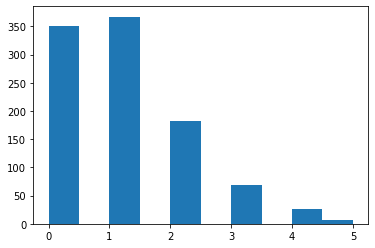

In [44]:
plt.hist(l_degrees)